In [1]:
# https://github.com/hhuynh000/EE399_HW2
# Import statements
import sys
from google.colab import drive
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
# Check if running on Google Colab
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  drive.mount('/content/drive', force_remount=True)
  %cd /content/drive/MyDrive/EE399/hw2

Mounted at /content/drive
/content/drive/MyDrive/EE399/hw2


In [3]:
# Import data set
results = loadmat('yalefaces.mat')
X = results['X']
print('Data Dimension:', X.shape)

Data Dimension: (1024, 2414)


(a) Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation) between the first 100 images in the matrix X. Thus each element is given by $c_{jk} = x^{T}_{j}x_{k} $ where $x_{j}$ is the jth column of the matrix. Plot the correlation matrix using pcolor.

In [4]:
# Compute correlation matrix for the first 100 images
X100 = X[:,:100]

# Function to compute correlation matrix of data X using dot product
def corr(X):
  n = len(X[0])
  C = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      C[i,j] = np.dot(X[:,i], X[:,j])
  return C

C = corr(X100)
print('Correlation Matrix Dimension:', C.shape)

Correlation Matrix Dimension: (100, 100)


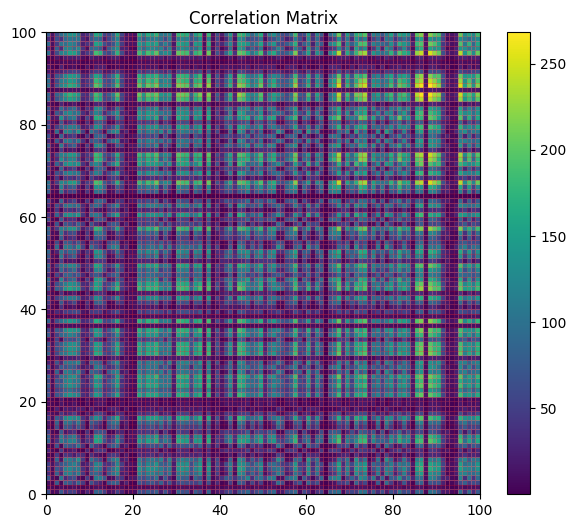

In [5]:
# Plot the correlation matrix
plt.figure(figsize=(7,6))
plt.pcolor(C, edgecolors='r', linewidths=0.1)
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

(b) From the correlation matrix for part (a), which two images are most highly correlated? Which are most uncorrelated? Plot these faces.

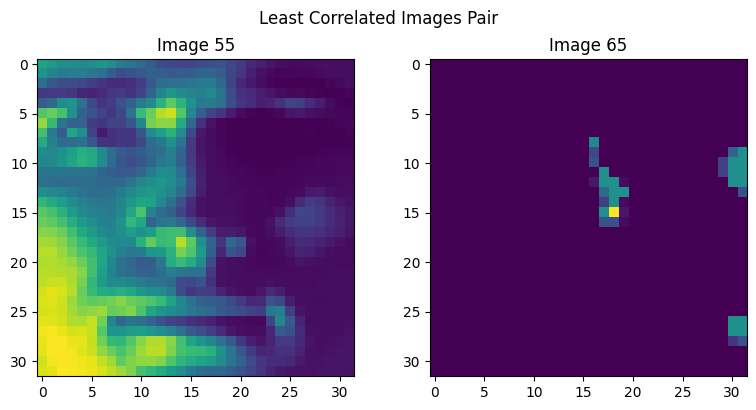

In [6]:
# Function to find the indices of the minimum value in a square matrix
def mat_argmin(X):
  n = len(X)
  index = (0,0)
  min = 100000
  for i in range(n):
    for j in range(n):
      if X[i,j] < min and i != j:
        index = (i,j)
        min = X[i,j]
  return index

# Function to find the indices of the maximum value in a square matrix
def mat_argmax(X):
  n = len(X)
  index = (0,0)
  max = 0
  n = len(X)
  for i in range(n):
    for j in range(n):
      if X[i,j] > max and i != j:
        index = (i,j)
        max = X[i,j]
  return index

min_index = mat_argmin(C)

# Plot minimum correlated images
plt.figure(figsize=(8,4))
plt.suptitle('Least Correlated Images Pair')
plt.subplot(1,2,1)
img = X[:,min_index[0]].reshape(32,32)
plt.title('Image ' + str(min_index[0]+1))
plt.imshow(img)
plt.subplot(1,2,2)
img = X[:,min_index[1]].reshape(32,32)
plt.title('Image ' + str(min_index[1]+1))
plt.imshow(img)
plt.tight_layout()
plt.show()

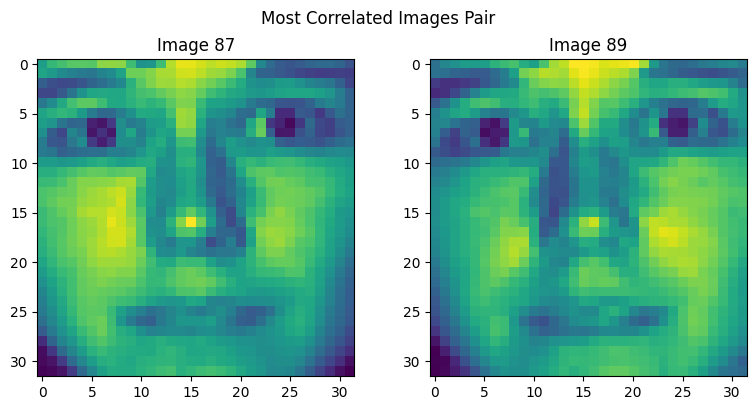

In [7]:
max_index = mat_argmax(C)

# Plot maximum correlated images
plt.figure(figsize=(8,4))
plt.suptitle('Most Correlated Images Pair')
plt.subplot(1,2,1)
img = X[:,max_index[0]].reshape(32,32)
plt.title('Image ' + str(max_index[0]+1))
plt.imshow(img)
plt.subplot(1,2,2)
img = X[:,max_index[1]].reshape(32,32)
plt.title('Image ' + str(max_index[1]+1))
plt.imshow(img)
plt.tight_layout()
plt.show()

(c) Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the correlation matrix between them.

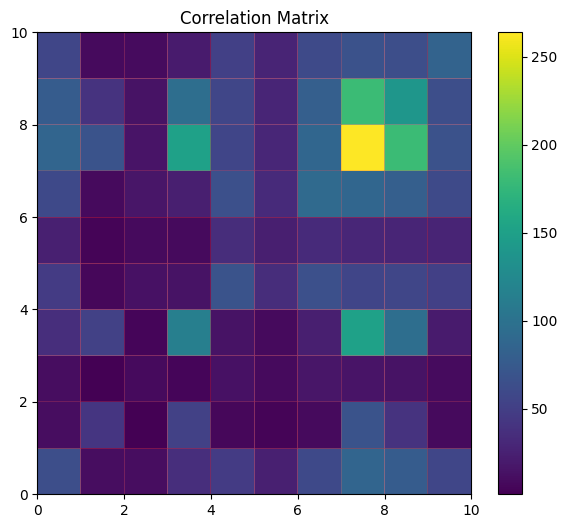

In [8]:
img_arr = np.array([1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005])
index_arr = img_arr - 1
X10 = X[:,index_arr]
C = corr(X10)
# Plot the correlation matrix
plt.figure(figsize=(7,6))
plt.pcolor(C, edgecolors='r', linewidths=0.1)
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

(d) Create the matrix $Y = XX^{T} $and find the first six eigenvectors with the largest magnitude eigenvalue.

In [9]:
Y = X@X.T
# Compute eigenvectors and eigenvalues of Y
eigenvalues, eigenvectors = np.linalg.eigh(Y)
# Sort by largest eigenvalues
index = np.flip(np.argsort(eigenvalues))
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:,index]
# Get top six egienvectors with largest eigenvalue
top_eigenvectors = eigenvectors[:,:6]
print('Eigenvectors Dimension:', top_eigenvectors.shape)

Eigenvectors Dimension: (1024, 6)


(e) SVD the matrix X and find the first six principal component directions.

In [10]:
# Performing SVD
U, D, VT = np.linalg.svd(X)

In [11]:
# Get first six principal component directions
k = 6
pcd = (U @ np.diag(D))[:, :k]
print('Principal Components Dimension', pcd.shape)

Principal Components Dimension (1024, 6)


(f) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e)  and compute the norm of difference of their absolute values.

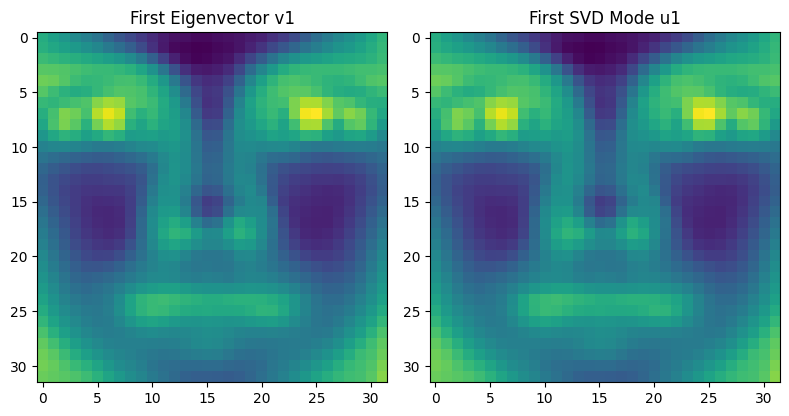

In [12]:
v1 = top_eigenvectors[:,0]
u1 = pcd[:,0]
# Plot maximum correlated images
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
img = v1.reshape(32,32)
plt.title('First Eigenvector v1')
plt.imshow(img)
plt.subplot(1,2,2)
img = u1.reshape(32,32)
plt.title('First SVD Mode u1')
plt.imshow(img)
plt.tight_layout()
plt.show()

In [13]:
# Compute the norm of difference
diff = np.linalg.norm(np.abs(v1)-np.abs(u1))
print('Norm of difference:', diff)

Norm of difference: 482.7566070390004


(g) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6 SVD modes

In [14]:
# Compute the percentage of variance captured by each of the first 6 SVD modes
pov = [D[i]/np.sum(D) for i in range(k)]
print('The top 6 SVD mode percentage of variance:', np.round(pov, 4))

The top 6 SVD mode percentage of variance: [0.1661 0.0761 0.0312 0.0267 0.0156 0.015 ]


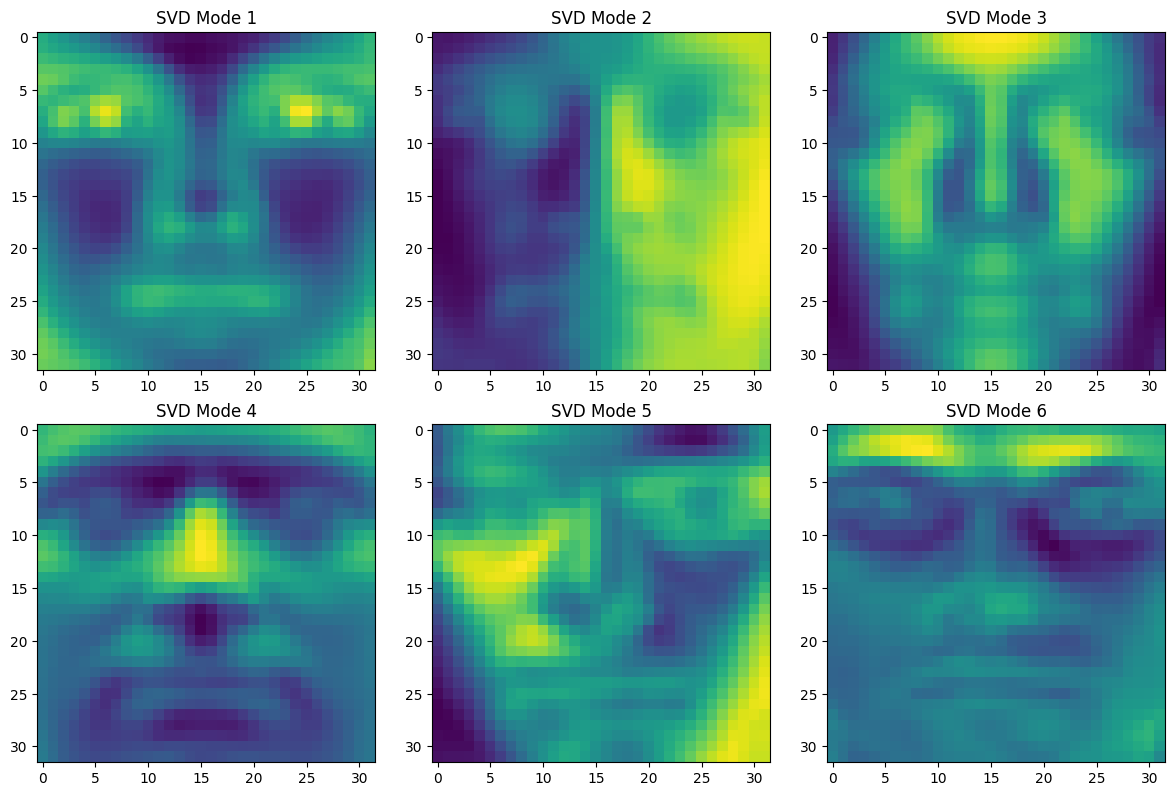

In [15]:
# Plot the first 6 SVD modes
plt.figure(figsize=(12,8))
for i in range(k):
  plt.subplot(2,3,i+1)
  plt.title('SVD Mode ' + str(i+1))
  img = pcd[:,i].reshape(32,32)
  plt.imshow(img)
plt.tight_layout()
plt.show()